In [21]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
import statsmodels.stats.descriptivestats as ds

In [22]:
def parser(s):
        return datetime.strptime(s, '%m/%Y')

# Read Level Data

## Read Financial Data Variables

In [3]:
#Read Gas Price Data
gas_price_df= pd.read_csv(r'C:\Users\Anthony\Desktop\month\gas_price_clean_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(gas_price_df.shape)
gas_price_df = gas_price_df.rename(columns={'Return':'Gas Price'})
gas_price_df.head(5)


(19, 1)


,Price
Date,
2020-07-01,1.77
2020-08-01,2.30
2020-09-01,1.92
2020-10-01,2.39
2020-11-01,2.61


In [23]:
#Read Bitcoin Price Data
bitcoin_price_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\Book2.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(bitcoin_price_df.shape)
bitcoin_price_df = bitcoin_price_df.rename(columns={'Return':'Bitcoin Price'})
bitcoin_price_df.head(5)


C:\Users\Anthony\AppData\Local\Temp\ipykernel_8000\1780507511.py:2: FutureWarning: 
        Use pd.to_datetime instead.

  bitcoin_price_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\Book2.csv', parse_dates=[0], index_col=0, date_parser=parser)


ValueError: time data 'Jul-20' does not match format '%m/%Y'

In [8]:
#Read Oil Price Data
oil_price_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\oil_price_clean_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(oil_price_df.shape)
oil_price_df = oil_price_df.rename(columns={'Return':'Oil Price'})
oil_price_df.head(5)

(19, 1)


,Price
Date,
2020-07-01,40.71
2020-08-01,42.34
2020-09-01,39.63
2020-10-01,39.40
2020-11-01,40.94


In [9]:
#Read Coal Price Data
coal_price_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\coal_price_clean_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(coal_price_df.shape)
coal_price_df = coal_price_df.rename(columns={'Return':'Coal Price'})
coal_price_df.head(5)

(18, 1)


,Price
Date,
2020-08-01,11.60
2020-09-01,11.70
2020-10-01,11.65
2020-11-01,11.60
2020-12-01,11.55


## Read Non-Financial Data Variables

In [10]:
#Read Data
withdrawls_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\withdrawls_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
withdrawls_df = withdrawls_df.rename(columns={'Withdrawls':'Withdrawals'})
print(withdrawls_df.shape)
withdrawls_df.head(5)

(18, 1)


,Withdrawals
Date,
2020-08-01,3349817
2020-09-01,3265272
2020-10-01,3363756
2020-11-01,3352374
2020-12-01,3489506


In [11]:
#Read Data
storage_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\storage_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(storage_df.shape)
storage_df.head(5)

(19, 1)


,Storage
Date,
2020-07-01,4842725
2020-08-01,4845046
2020-09-01,4845020
2020-10-01,4844988
2020-11-01,4845169


In [12]:
#Read Data
imports_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\imports_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(imports_df.shape)
imports_df.head(5)

(18, 1)


,Imports
Date,
2020-08-01,211352
2020-09-01,174225
2020-10-01,199306
2020-11-01,211736
2020-12-01,266618


In [13]:
#Read Data
exports_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\exports_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(exports_df.shape)
exports_df.head(5)

(18, 1)


,Exports
Date,
2020-08-01,359159
2020-09-01,395424
2020-10-01,481621
2020-11-01,528210
2020-12-01,553176


In [14]:
#Read Data
hdd_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\hdd_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
hdd_df = hdd_df.rename(columns={'Value':'Heating Degree-days'})
print(hdd_df.shape)
hdd_df.head(5)

(18, 1)


,Heating Degree-days
Date,
2020-08-01,7
2020-09-01,59
2020-10-01,252
2020-11-01,428
2020-12-01,761


In [15]:
#Read Data
cdd_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\cdd_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
cdd_df = cdd_df.rename(columns={'Value':'Cooling Degree-days'})
print(cdd_df.shape)
cdd_df.head(5)

(18, 1)


,Cooling Degree-days
Date,
2020-08-01,351
2020-09-01,175
2020-10-01,77
2020-11-01,28
2020-12-01,5


# Stationarity Test for Level Data

### Stationarity Tests for Financial Level Data

In [ ]:
#Function to calculate Augmented Dickey-Fuller Test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Used Lag: %f' % result[2])
    print ('Maximized IC: %f' % result[5])
    if result[0] < result[4]['5%']:
        print('Reject H0 - Time Series is Stationary')
    else:
        print('Failed to Reject H0 - Time Series is Non-Stationary')

In [ ]:
#Stationarity test for US Natural Gas Price - Augmented Dickey-Fuller test
gas_price_array = gas_price_df.to_numpy()
perform_adf_test(gas_price_array)

In [ ]:
#Stationarity test for Bitcoin Price - Augmented Dickey-Fuller test
#bit_price_array = bitcoin_price_df.to_numpy()
#perform_adf_test(bit_price_array)

In [ ]:
#Stationarity test for US Oil Price - Augmented Dickey-Fuller test
oil_price_array = oil_price_df.to_numpy()
perform_adf_test(oil_price_array)

In [ ]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
coal_price_array = coal_price_df.to_numpy()
perform_adf_test(coal_price_array)

### Stationarity Tests for Non-Financial Level Data

In [65]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
withdrawls_array = withdrawls_df.to_numpy()
perform_adf_test(withdrawls_array)

ADF Statistic: 1.633036
p-value: 0.997953
Used Lag: 7.000000
Maximized IC: 227.726992
Failed to Reject H0 - Time Series is Non-Stationary


In [66]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
storage_array = storage_df.to_numpy()
perform_adf_test(storage_array)

ADF Statistic: -0.989282
p-value: 0.757153
Used Lag: 0.000000
Maximized IC: 245.008802
Failed to Reject H0 - Time Series is Non-Stationary


In [67]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
imports_array = imports_df.to_numpy()
perform_adf_test(imports_array)

ADF Statistic: -1.414243
p-value: 0.575429
Used Lag: 7.000000
Maximized IC: 223.726564
Failed to Reject H0 - Time Series is Non-Stationary


In [68]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
exports_array = exports_df.to_numpy()
perform_adf_test(exports_array)

ADF Statistic: -1.283414
p-value: 0.636726
Used Lag: 6.000000
Maximized IC: 232.731612
Failed to Reject H0 - Time Series is Non-Stationary


In [69]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
hdd_array = hdd_df.to_numpy()
perform_adf_test(hdd_array)

ADF Statistic: -2.327658
p-value: 0.163203
Used Lag: 7.000000
Maximized IC: 114.342008
Failed to Reject H0 - Time Series is Non-Stationary


In [70]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
cdd_array = cdd_df.to_numpy()
perform_adf_test(cdd_array)

ADF Statistic: -2.218511
p-value: 0.199596
Used Lag: 7.000000
Maximized IC: 105.812874
Failed to Reject H0 - Time Series is Non-Stationary


# Level Data Time Series Plots

Text(0.5, 0, 'Date')

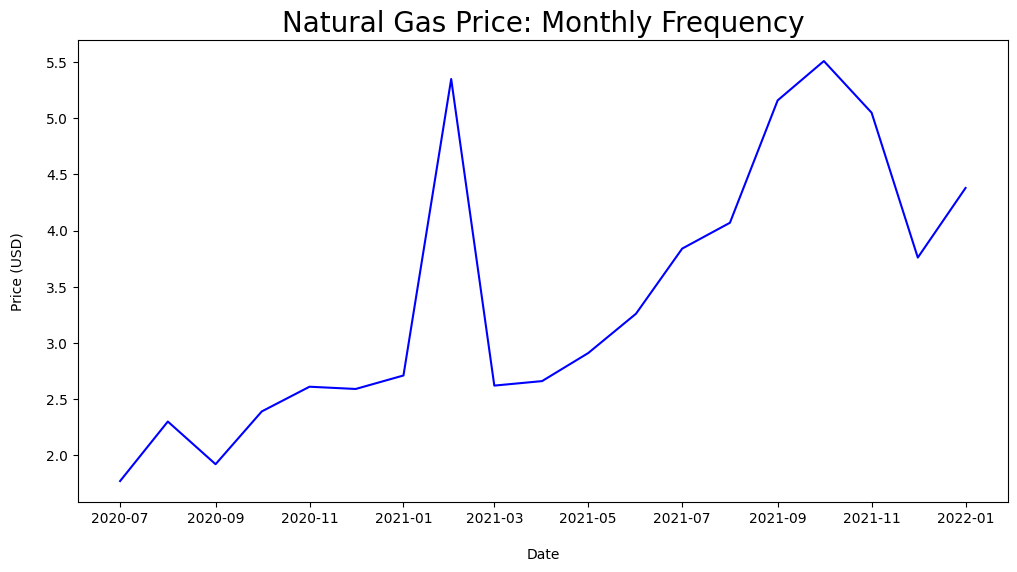

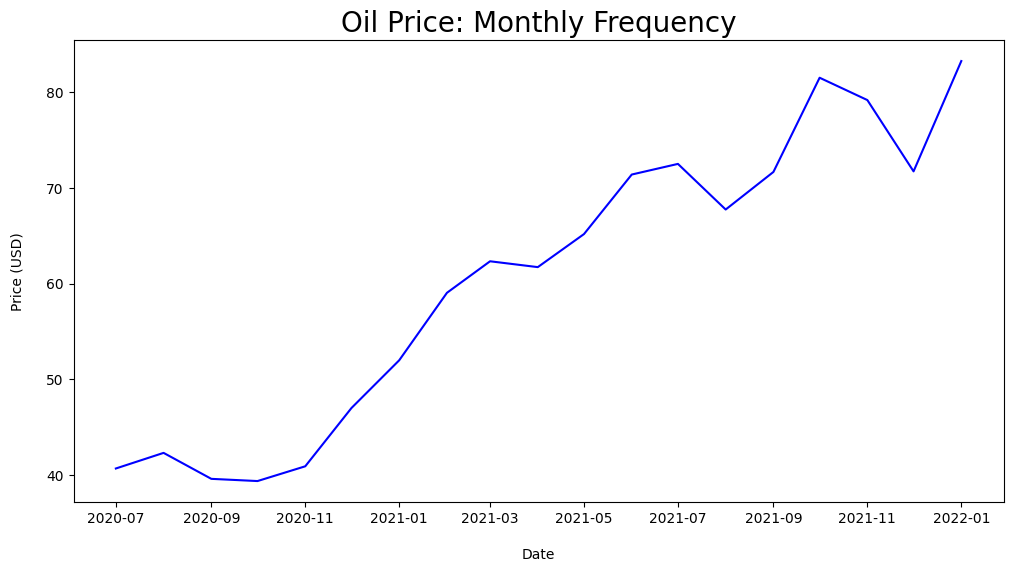

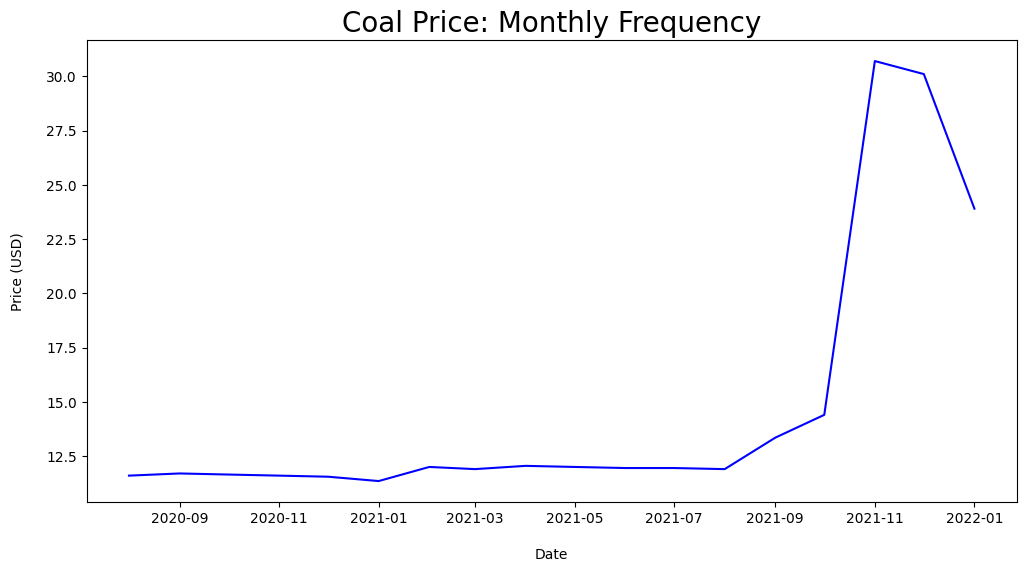

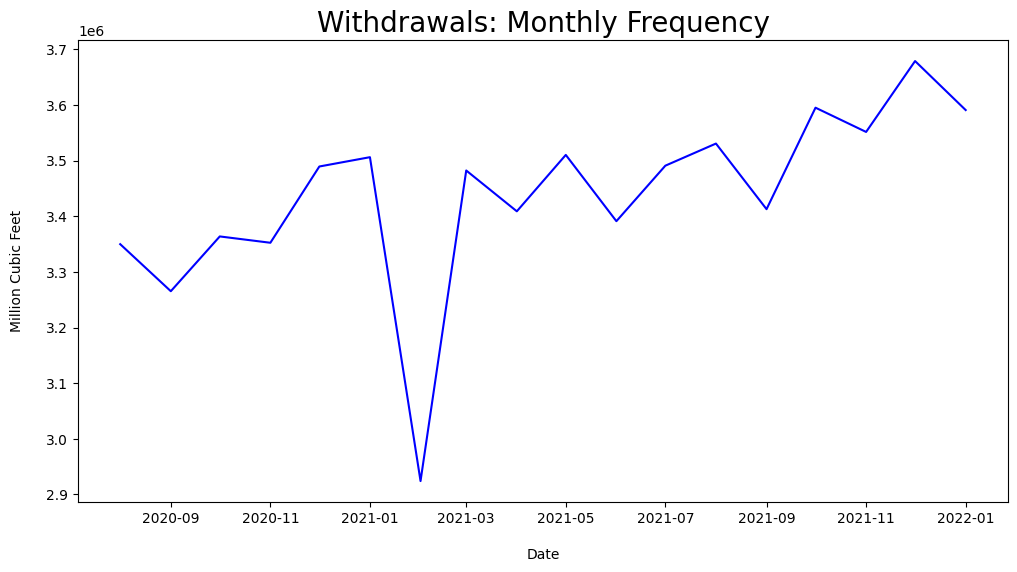

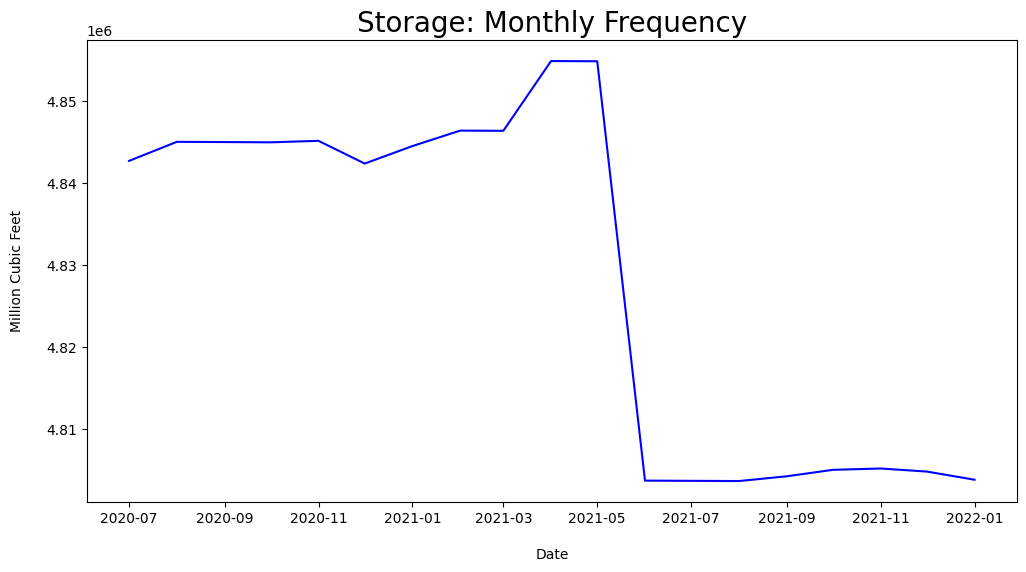

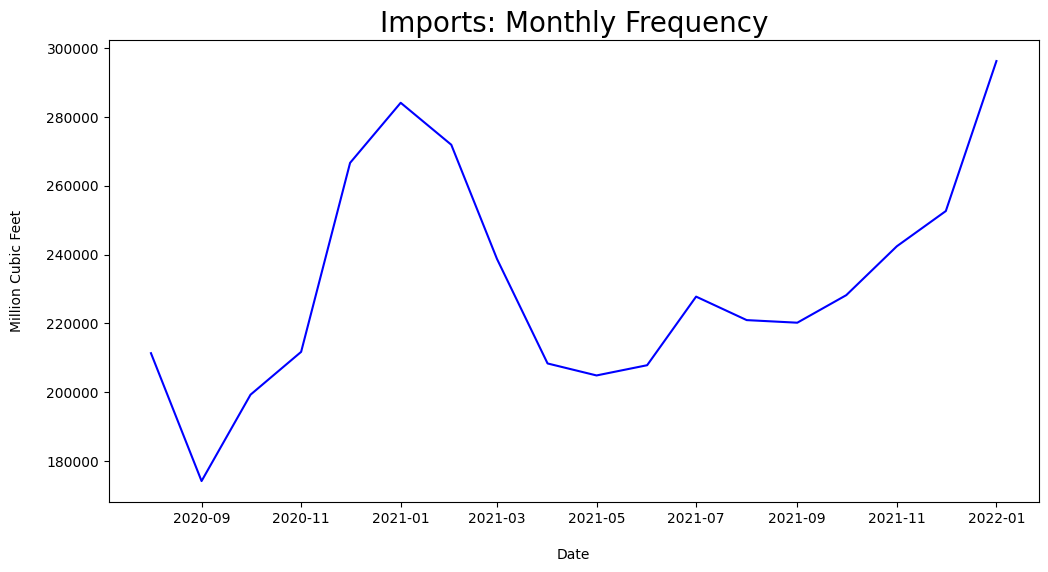

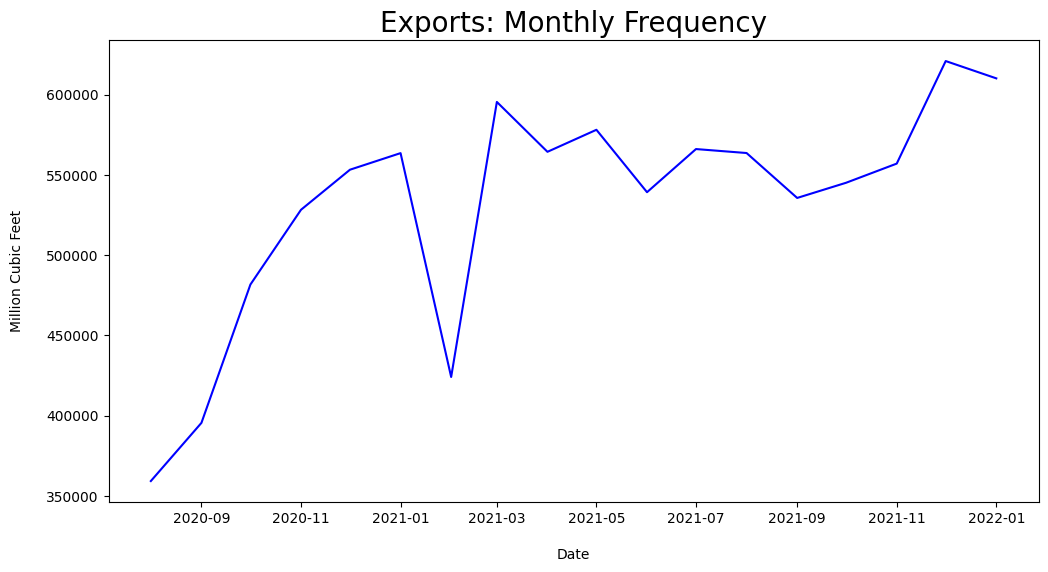

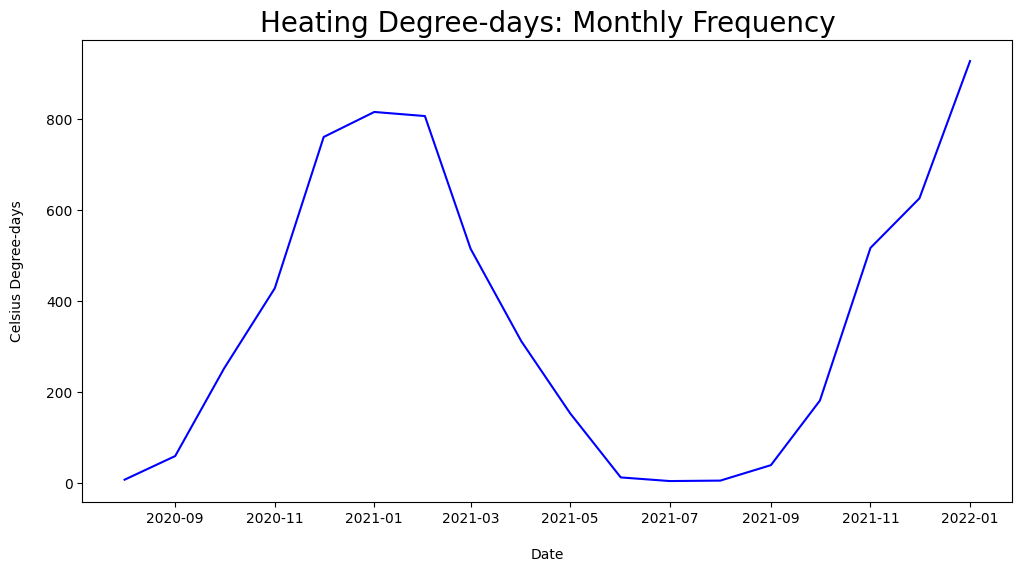

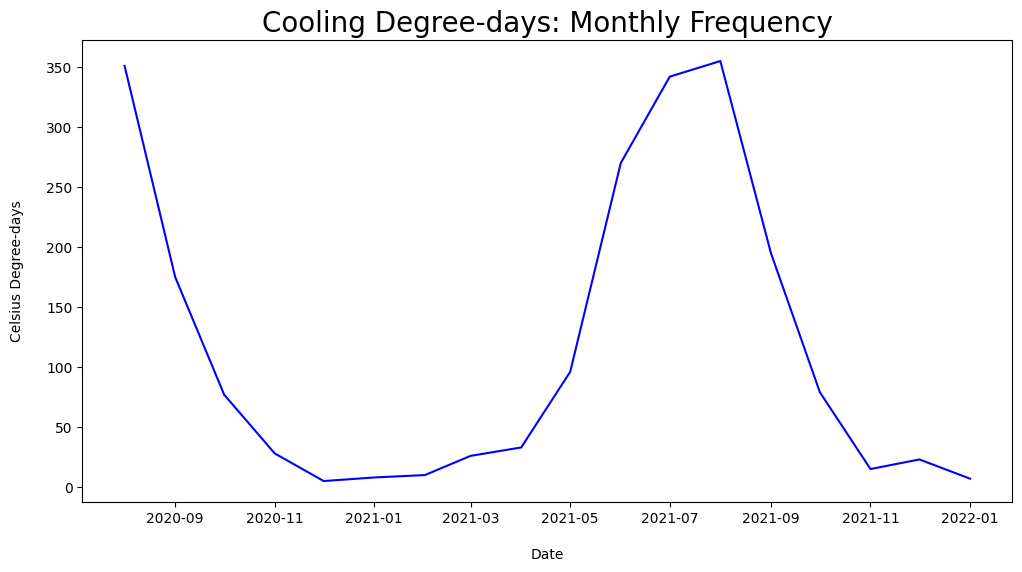

In [24]:
"""
plt.figure(figsize=(12,6))
bitcoin_price, = plt.plot(bitcoin_price_df, color='blue')
plt.title('Bitcoin Price: Monthly Frequency', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0) 
"""

plt.figure(figsize=(12,6))
gas_price, = plt.plot(gas_price_df, color='blue')
plt.title('Natural Gas Price: Monthly Frequency', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)

plt.figure(figsize=(12,6))
oil_price, = plt.plot(oil_price_df, color='blue')
plt.title('Oil Price: Monthly Frequency', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)

plt.figure(figsize=(12,6))
coal_price, = plt.plot(coal_price_df, color='blue')
plt.title('Coal Price: Monthly Frequency', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)

plt.figure(figsize=(12,6))
withdrawals, = plt.plot(withdrawls_df, color='blue')
plt.title('Withdrawals: Monthly Frequency', fontsize=20)
plt.ylabel('Million Cubic Feet', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)

plt.figure(figsize=(12,6))
storage, = plt.plot(storage_df, color='blue')
plt.title('Storage: Monthly Frequency', fontsize=20)
plt.ylabel('Million Cubic Feet', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)

plt.figure(figsize=(12,6))
imports, = plt.plot(imports_df, color='blue')
plt.title('Imports: Monthly Frequency', fontsize=20)
plt.ylabel('Million Cubic Feet', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)

plt.figure(figsize=(12,6))
exports, = plt.plot(exports_df, color='blue')
plt.title('Exports: Monthly Frequency', fontsize=20)
plt.ylabel('Million Cubic Feet', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)

plt.figure(figsize=(12,6))
hdd, = plt.plot(hdd_df, color='blue')
plt.title('Heating Degree-days: Monthly Frequency', fontsize=20)
plt.ylabel('Celsius Degree-days', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)

plt.figure(figsize=(12,6))
cdd, = plt.plot(cdd_df, color='blue')
plt.title('Cooling Degree-days: Monthly Frequency', fontsize=20)
plt.ylabel('Celsius Degree-days', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)

#

# Read Log-Return Data

### Read Financial Return data

In [25]:
#Read Gas Price Data
gas_return_df= pd.read_csv(r'C:\Users\Anthony\Desktop\month\gas_return_clean_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(gas_price_df.shape)
gas_return_df = gas_return_df.rename(columns={'Return':'Nat Gas Return'})
gas_return_df.head(5)


(19, 1)


,Nat Gas Return
Date,
2020-08-01,0.113755
2020-09-01,-0.078427
2020-10-01,0.095097
2020-11-01,0.038243
2020-12-01,-0.003341


In [26]:
#Read Bitcoin Price Data
bitcoin_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\bitcoin_return_clean_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(bitcoin_return_df.shape)
bitcoin_return_df = bitcoin_return_df.rename(columns={'Return':'Bitcoin Return'})
bitcoin_return_df.head(5)


(18, 1)


,Bitcoin Return
Date,
2020-08-01,0.011581
2020-09-01,-0.033998
2020-10-01,0.107394
2020-11-01,0.154642
2020-12-01,0.167453


In [27]:
#Read Oil Price Data
oil_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\oil_return_clean_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(oil_return_df.shape)
oil_return_df = oil_return_df.rename(columns={'Return':'Oil Return'})
oil_return_df.head(5)

(18, 1)


,Oil Return
Date,
2020-08-01,0.017050
2020-09-01,-0.028727
2020-10-01,-0.002528
2020-11-01,0.016652
2020-12-01,0.060135


In [28]:
#Read Coal Price Data
coal_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\coal_return_clean_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(coal_price_df.shape)
coal_return_df = coal_return_df.rename(columns={'Return':'Coal Return'})
coal_return_df.head(5)

(18, 1)


,Coal Return
Date,
2020-08-01,-0.014723
2020-09-01,0.003728
2020-10-01,-0.001860
2020-11-01,-0.001868
2020-12-01,-0.001876


### Read Non-Financial Return data

In [29]:
#Read Data
withdrawls_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\withdrawls_return_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(withdrawls_return_df.shape)
withdrawls_return_df = withdrawls_return_df.rename(columns={'Returns':'Withdrawals % Change'})
withdrawls_return_df.head(5)

(18, 1)


,Withdrawals % Change
Date,
2020-08-01,-0.003072
2020-09-01,-0.011102
2020-10-01,0.012905
2020-11-01,-0.001472
2020-12-01,0.017411


In [30]:
#Read Data
storage_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\storage_return_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
storage_return_df = storage_return_df.rename(columns={'Return':'Storage % Change'})
print(storage_return_df.shape)
storage_return_df.head(5)

(18, 1)


,Storage % Change
Date,
2020-08-01,0.000208
2020-09-01,-0.000002
2020-10-01,-0.000003
2020-11-01,0.000016
2020-12-01,-0.000248


In [31]:
#Read Data
imports_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\imports_return_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
imports_return_df = imports_return_df.rename(columns={'Return':'Imports % Change'})
print(imports_return_df.shape)
imports_return_df.head(5)

(18, 1)


,Imports % Change
Date,
2020-08-01,0.001921
2020-09-01,-0.083896
2020-10-01,0.058410
2020-11-01,0.026274
2020-12-01,0.100095


In [32]:
#Read Data
exports_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\exports_return_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
exports_return_df = exports_return_df.rename(columns={'Return':'Exports % Change'})
print(exports_return_df.shape)
exports_return_df.head(5)

(18, 1)


,Exports % Change
Date,
2020-08-01,0.012254
2020-09-01,0.041776
2020-10-01,0.085642
2020-11-01,0.040101
2020-12-01,0.020057


In [33]:
#Read Data
hdd_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\hdd_return_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
hdd_return_df = hdd_return_df.rename(columns={'Return':'HDD % Change'})
print(hdd_return_df.shape)
hdd_return_df.head(5)

(18, 1)


,HDD % Change
Date,
2020-08-01,0.243038
2020-09-01,0.925754
2020-10-01,0.630549
2020-11-01,0.230043
2020-12-01,0.249941


In [34]:
#Read Data
cdd_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\month\cdd_return_m.csv', parse_dates=[0], index_col=0, date_parser=parser)
cdd_return_df = cdd_return_df.rename(columns={'Returns':'CDD % Change'})
print(cdd_return_df.shape)
cdd_return_df.head(5)

(18, 1)


,CDD % Change
Date,
2020-08-01,-0.051290
2020-09-01,-0.302269
2020-10-01,-0.356547
2020-11-01,-0.439333
2020-12-01,-0.748188


# Stationarity Tests for Log-Return Data

In [36]:
#Function to calculate Augmented Dickey-Fuller Test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Used Lag: %f' % result[2])
    print ('Maximized IC: %f' % result[5])
    if result[0] < result[4]['5%']:
        print('Reject H0 - Time Series is Stationary')
    else:
        print('Failed to Reject H0 - Time Series is Non-Stationary')

In [37]:
#Stationarity test for US Natural Gas Price - Augmented Dickey-Fuller test
gas_return_array = gas_return_df.to_numpy()
perform_adf_test(gas_return_array)

ADF Statistic: -3.305704
p-value: 0.014625
Used Lag: 7.000000
Maximized IC: -36.842930
Reject H0 - Time Series is Stationary


In [38]:
#Stationarity test for Bitcoin Price - Augmented Dickey-Fuller test
bit_return_array = bitcoin_return_df.to_numpy()
perform_adf_test(bit_return_array)

ADF Statistic: -1.122074
p-value: 0.706189
Used Lag: 6.000000
Maximized IC: -29.428261
Failed to Reject H0 - Time Series is Non-Stationary


In [39]:
#Stationarity test for US Oil Price - Augmented Dickey-Fuller test
oil_return_array = oil_return_df.to_numpy()
perform_adf_test(oil_return_array)

ADF Statistic: -1.907152
p-value: 0.328704
Used Lag: 7.000000
Maximized IC: -71.820839
Failed to Reject H0 - Time Series is Non-Stationary


In [40]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
coal_return_array = coal_return_df.to_numpy()
perform_adf_test(coal_return_array)

ADF Statistic: -3.550041
p-value: 0.006791
Used Lag: 0.000000
Maximized IC: -12.485137
Reject H0 - Time Series is Stationary


In [41]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
withdrawls_return_array = withdrawls_return_df.to_numpy()
perform_adf_test(withdrawls_return_array)

ADF Statistic: -1.922417
p-value: 0.321590
Used Lag: 5.000000
Maximized IC: -83.168554
Failed to Reject H0 - Time Series is Non-Stationary


In [42]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
storage_return_array = storage_return_df.to_numpy()
perform_adf_test(storage_return_array)

ADF Statistic: 1.258721
p-value: 0.996368
Used Lag: 7.000000
Maximized IC: -99.315431
Failed to Reject H0 - Time Series is Non-Stationary


In [43]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
imports_return_array = imports_return_df.to_numpy()
perform_adf_test(imports_return_array)

ADF Statistic: -2.357340
p-value: 0.154140
Used Lag: 7.000000
Maximized IC: -55.937087
Failed to Reject H0 - Time Series is Non-Stationary


In [44]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
exports_return_array = exports_return_df.to_numpy()
perform_adf_test(exports_return_array)

ADF Statistic: -4.081461
p-value: 0.001039
Used Lag: 5.000000
Maximized IC: -51.094077
Reject H0 - Time Series is Stationary


In [45]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
hdd_return_array = hdd_return_df.to_numpy()
perform_adf_test(hdd_return_array)

ADF Statistic: -1.818039
p-value: 0.371543
Used Lag: 0.000000
Maximized IC: 15.350691
Failed to Reject H0 - Time Series is Non-Stationary


In [46]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
cdd_return_array = cdd_return_df.to_numpy()
perform_adf_test(cdd_return_array)

ADF Statistic: -2.876725
p-value: 0.048122
Used Lag: 7.000000
Maximized IC: -0.704856
Failed to Reject H0 - Time Series is Non-Stationary


# Log-Return Time Series Plots

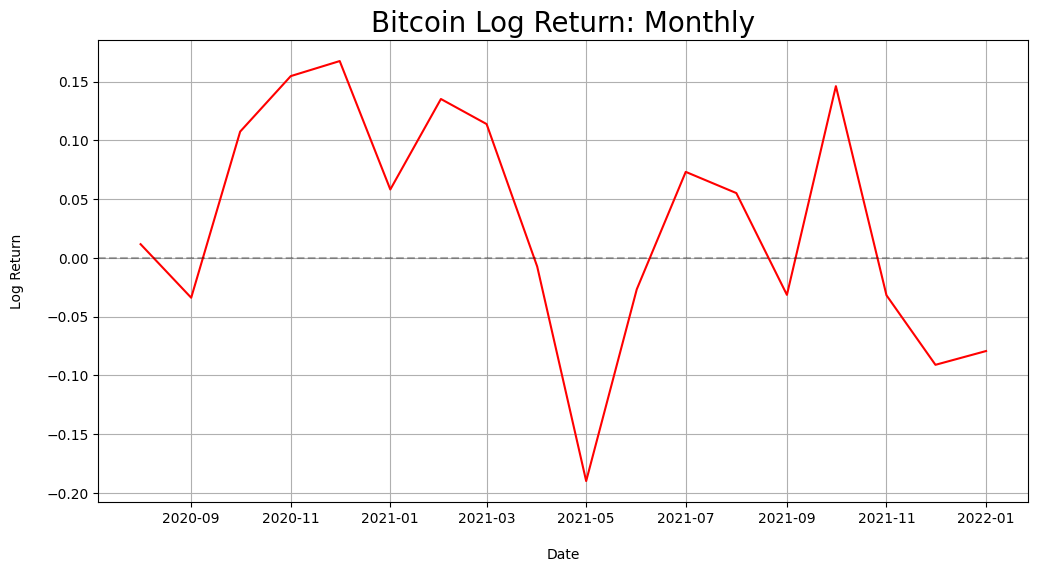

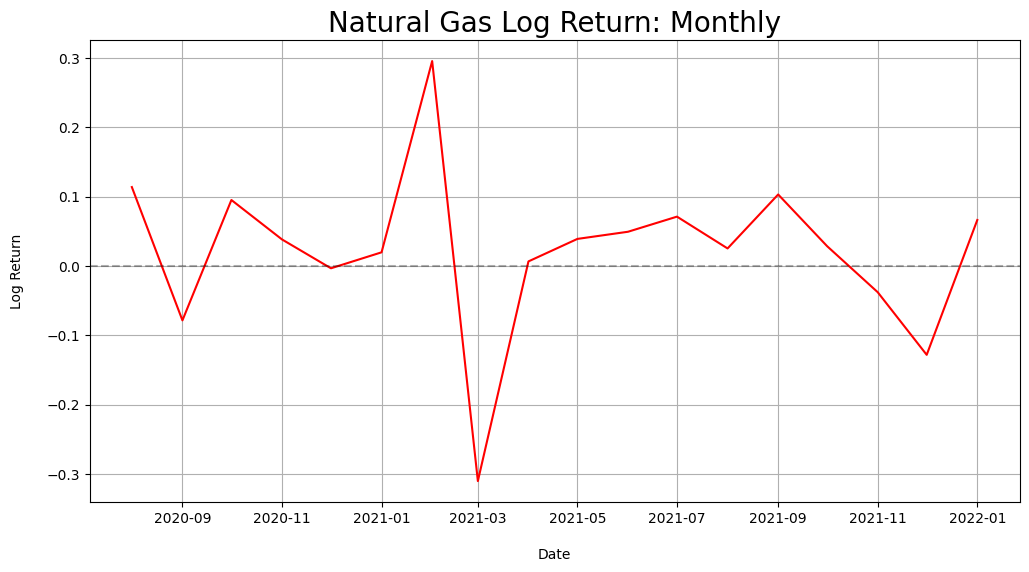

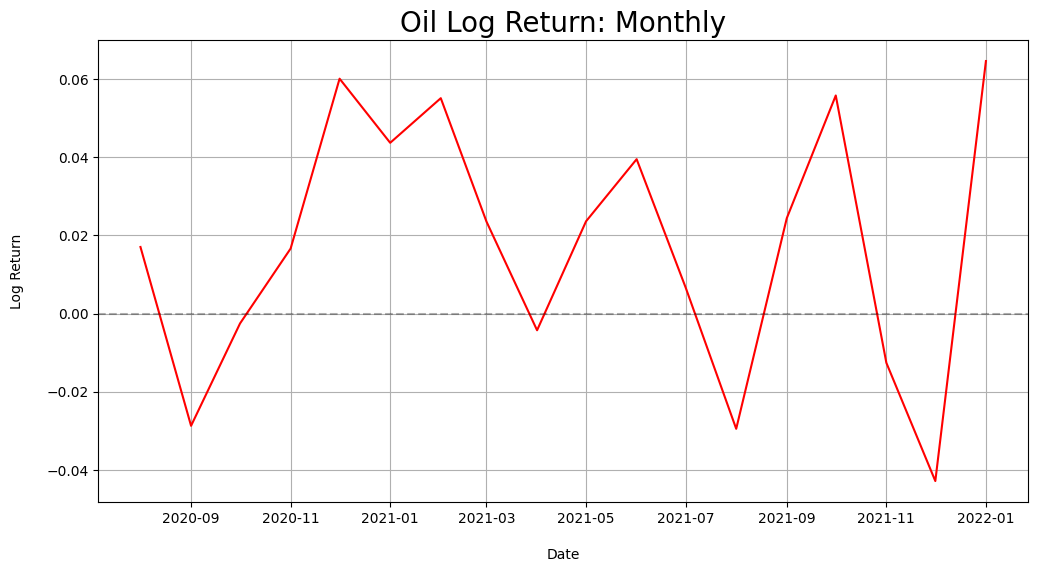

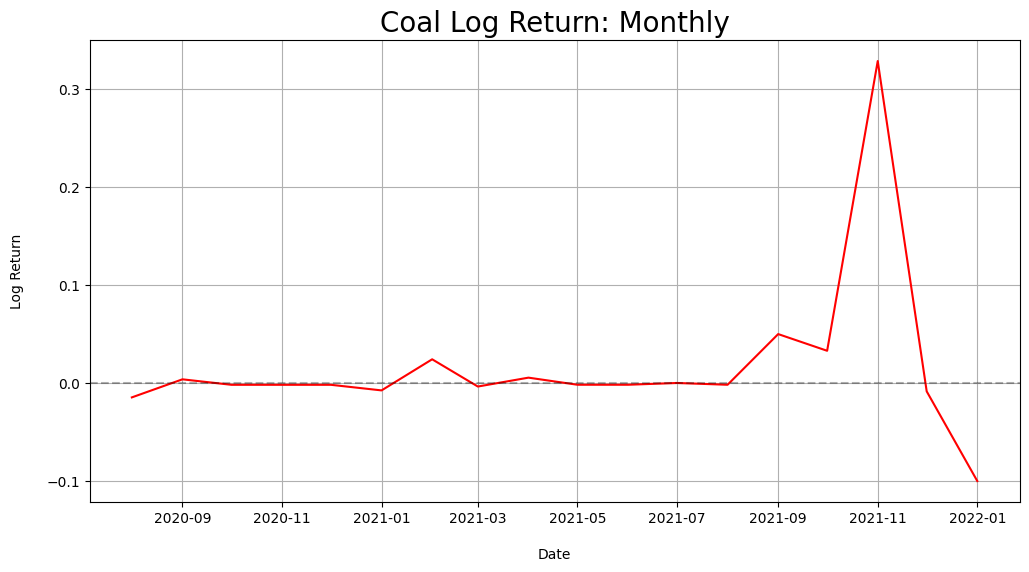

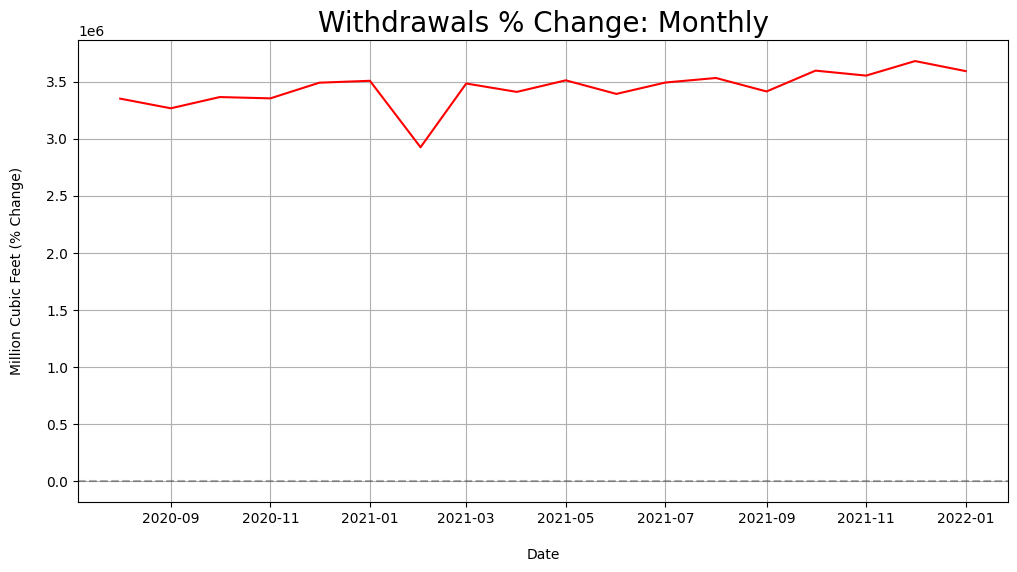

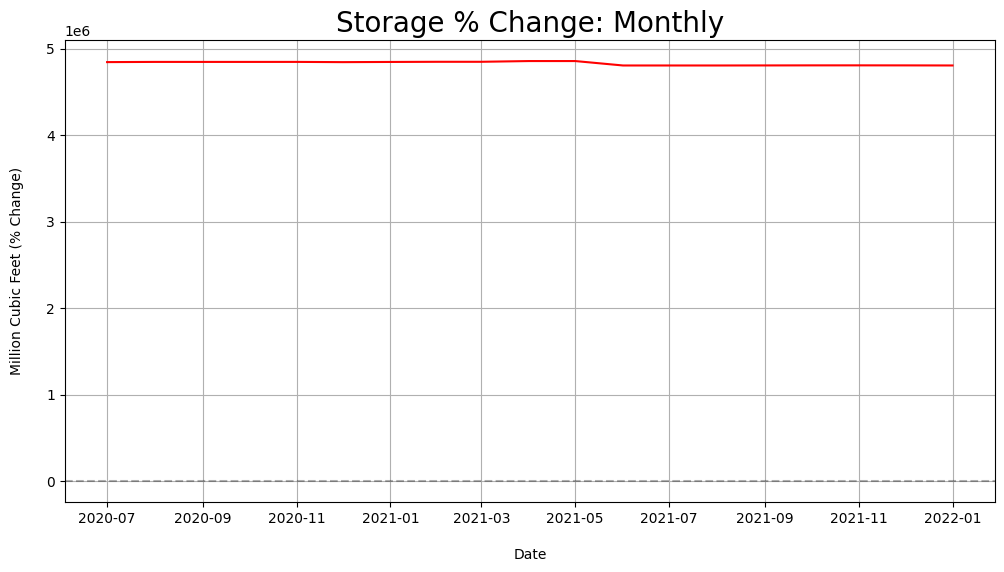

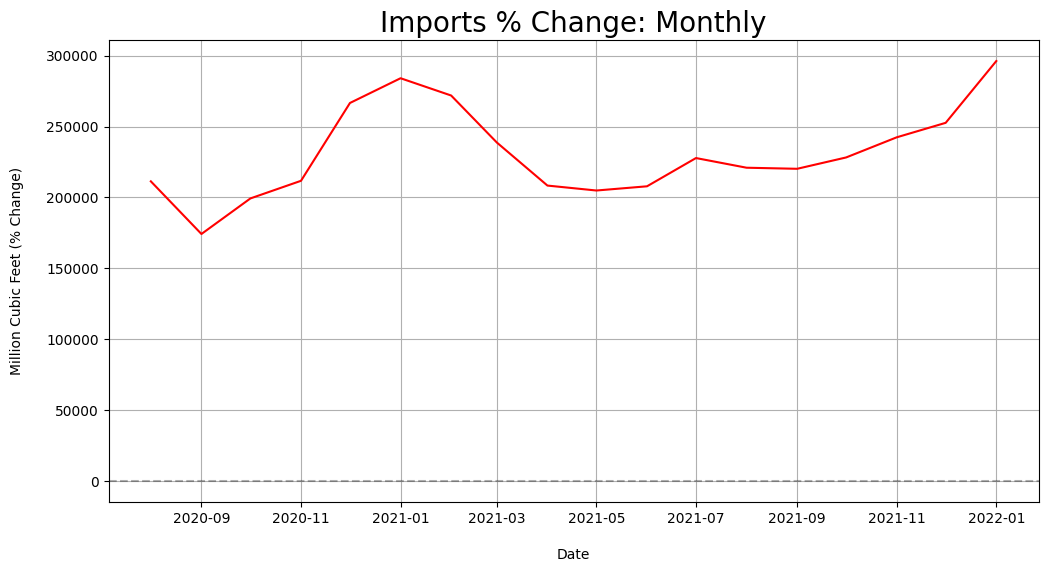

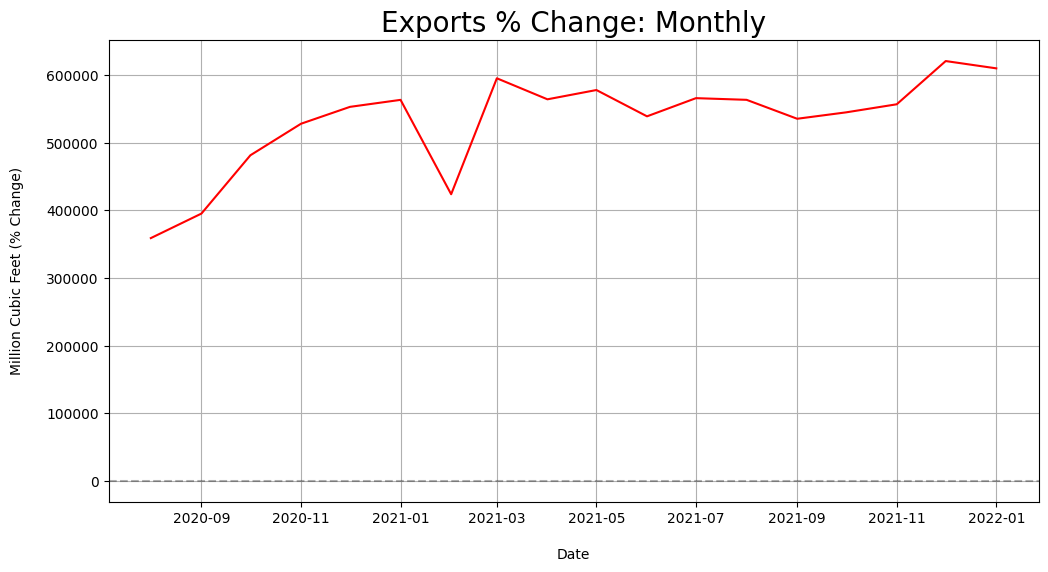

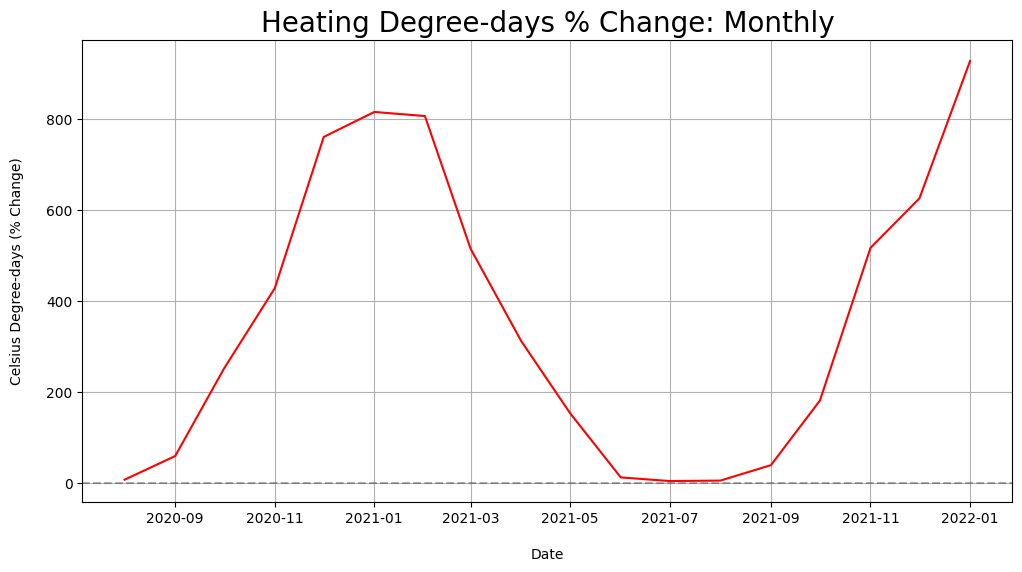

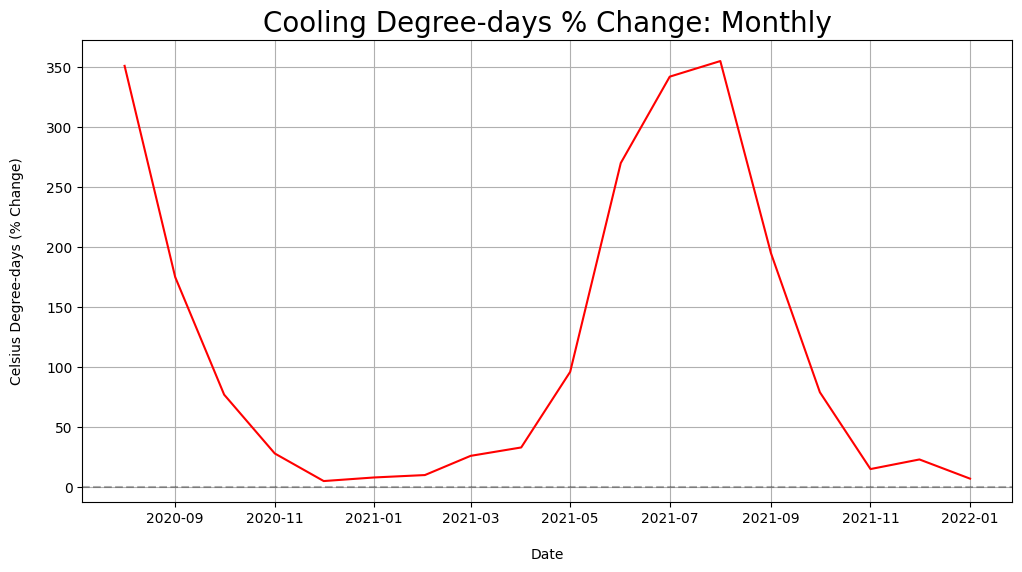

In [55]:
plt.figure(figsize=(12,6))
bitcoin_return, = plt.plot(bitcoin_return_df, color='red')
plt.title('Bitcoin Log Return: Monthly', fontsize=20)
plt.ylabel('Log Return', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('monthly bitcoin returns.png')

plt.figure(figsize=(12,6))
gas_return, = plt.plot(gas_return_df, color='red')
plt.title('Natural Gas Log Return: Monthly', fontsize=20)
plt.ylabel('Log Return',labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('monthly ng returns.png')


plt.figure(figsize=(12,6))
oil_return, = plt.plot(oil_return_df, color='red')
plt.title('Oil Log Return: Monthly', fontsize=20)
plt.ylabel('Log Return', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('monthly oil returns.png')

plt.figure(figsize=(12,6))
coal_return, = plt.plot(coal_return_df, color='red')
plt.title('Coal Log Return: Monthly', fontsize=20)
plt.ylabel('Log Return', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('monthly coal returns.png')

plt.figure(figsize=(12,6))
withdrawals_c, = plt.plot(withdrawls_df, color='red')
plt.title('Withdrawals % Change: Monthly', fontsize=20)
plt.ylabel('Million Cubic Feet (% Change)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('withdrawals.png')

plt.figure(figsize=(12,6))
storage_c, = plt.plot(storage_df, color='red')
plt.title('Storage % Change: Monthly', fontsize=20)
plt.ylabel('Million Cubic Feet (% Change)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('storage.png')


plt.figure(figsize=(12,6))
imports_c, = plt.plot(imports_df, color='red')
plt.title('Imports % Change: Monthly', fontsize=20)
plt.ylabel('Million Cubic Feet (% Change)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('imports.png')

plt.figure(figsize=(12,6))
exports_c, = plt.plot(exports_df, color='red')
plt.title('Exports % Change: Monthly', fontsize=20)
plt.ylabel('Million Cubic Feet (% Change)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('exports.png')

plt.figure(figsize=(12,6))
hdd_c, = plt.plot(hdd_df, color='red')
plt.title('Heating Degree-days % Change: Monthly', fontsize=20)
plt.ylabel('Celsius Degree-days (% Change)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('hdd.png')

plt.figure(figsize=(12,6))
cdd_c, = plt.plot(cdd_df, color='red')
plt.title('Cooling Degree-days % Change: Monthly', fontsize=20)
plt.ylabel('Celsius Degree-days (% Change)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('cdd.png')



# Merge Dataframes

In [48]:
#Bitcoin & Gas dataframe merge
bit_gas_merge_df = bitcoin_return_df.merge(gas_return_df, how='left', on=['Date']) 
#Bitcoin-Gas & Oil dataframe merge
bit_gas_oil_merge_df = bit_gas_merge_df.merge(oil_return_df, how='left', on=['Date'])
#Bitcoin-Gas-Oil & Coal dataframe merge
bit_gas_oil_coal_merge_df = bit_gas_oil_merge_df.merge(coal_return_df, how='left', on=['Date'])

merge4 = bit_gas_oil_coal_merge_df.merge(withdrawls_return_df, how='left', on=['Date'])

merge5 = merge4.merge(storage_return_df, how='left', on=['Date'])
merge6 = merge5.merge(imports_return_df, how='left', on=['Date'])
merge7 = merge6.merge(exports_return_df, how='left', on=['Date'])
merge8 = merge7.merge(hdd_return_df, how='left', on=['Date'])
var_df = merge8.merge(cdd_return_df, how='left', on=['Date'])

var_df.head(18)

,Bitcoin Return,Nat Gas Return,Oil Return,Coal Return,Withdrawals % Change,Storage % Change,Imports % Change,Exports % Change,HDD % Change,CDD % Change
Date,,,,,,,,,,
2020-08-01,0.011581,0.113755,0.017050,-0.014723,-0.003072,0.000208,0.001921,0.012254,0.243038,-0.051290
2020-09-01,-0.033998,-0.078427,-0.028727,0.003728,-0.011102,-0.000002,-0.083896,0.041776,0.925754,-0.302269
2020-10-01,0.107394,0.095097,-0.002528,-0.001860,0.012905,-0.000003,0.058410,0.085642,0.630549,-0.356547
2020-11-01,0.154642,0.038243,0.016652,-0.001868,-0.001472,0.000016,0.026274,0.040101,0.230043,-0.439333
2020-12-01,0.167453,-0.003341,0.060135,-0.001876,0.017411,-0.000248,0.100095,0.020057,0.249941,-0.748188
2021-01-01,0.058150,0.019670,0.043721,-0.007586,0.002080,0.000191,0.027528,0.008042,0.030306,0.204120
2021-02-01,0.135162,0.295384,0.055143,0.024185,-0.078882,0.000169,-0.019045,-0.123536,-0.004817,0.096910
2021-03-01,0.113823,-0.310052,0.023551,-0.003634,0.075907,-0.000002,-0.056476,0.147447,-0.195066,0.414973
2021-04-01,-0.007462,0.006580,-0.004271,0.005440,-0.009251,0.000761,-0.059063,-0.023281,-0.217653,0.103541


#

# Correlation Matrix

In [63]:
desc_stats_m = ds.describe(var_df).round(5)
desc_stats_m.head(20)
#desc_stats_m.to_csv(r'C:\Users\Anthony\Desktop\Disso images\tables\desc_stats_m.csv')

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\descriptivestats.py:418: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_res = stats.mode(ser.dropna())


,Bitcoin Return,Nat Gas Return,Oil Return,Coal Return,Withdrawals % Change,Storage % Change,Imports % Change,Exports % Change,HDD % Change,CDD % Change
nobs,18.00000,18.00000,18.00000,18.00000,18.00000,18.00000,18.00000,18.00000,18.00000,18.00000
missing,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
mean,0.02946,0.02186,0.01725,0.01662,0.00151,-0.00019,0.00825,0.01346,0.13142,-0.09731
std_err,0.00551,0.00671,0.00181,0.00462,0.00161,0.00006,0.00254,0.00301,0.02776,0.02134
upper_ci,0.04025,0.03502,0.02081,0.02568,0.00467,-0.00007,0.01323,0.01937,0.18582,-0.05548
lower_ci,0.01867,0.00871,0.01370,0.00756,-0.00165,-0.00032,0.00327,0.00756,0.07701,-0.13913
std,0.09911,0.12082,0.03264,0.08322,0.02901,0.00112,0.04577,0.05422,0.49963,0.38415
iqr,0.14404,0.07077,0.04651,0.00821,0.02307,0.00007,0.03894,0.04154,0.55185,0.54856
iqr_normal,0.10678,0.05246,0.03448,0.00608,0.01710,0.00005,0.02887,0.03079,0.40909,0.40664
mad,0.08287,0.07606,0.02615,0.04103,0.01810,0.00050,0.03406,0.03434,0.36467,0.32874


In [61]:
corr_m = var_df.corr(method='spearman').round(2)
#corr_m.to_csv(r'C:\Users\Anthony\Desktop\Disso images\tables\corr_m.csv')

#

# Linear Regression

### Bitcoin as Independent Variable

In [50]:
bit_x_df = var_df.drop('Nat Gas Return',axis=1)
#print(ols_x)
bit_x_df = sm.add_constant(bit_x_df)
results = sm.OLS(gas_return_df, bit_x_df).fit()


In [51]:
results.summary()

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Nat Gas Return   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     4.581
Date:                Sun, 18 Sep 2022   Prob (F-statistic):             0.0216
Time:                        02:42:01   Log-Likelihood:                 29.369
No. Observations:                  18   AIC:                            -38.74
Df Residuals:                       8   BIC:                            -29.83
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0230      0.025      0.910      0.390      -0.035       0.081
Bitcoin Return           0.1699      0.199      0.853      0.418      -0.289       0.629
Oil Return               0.1338      0.746      0.179      0.862      -1.587       1.855
Coal Return             -0.0884      0.248     -0.357      0.730      -0.660       0.483
Withdrawals % Change    -2.6510      1.554     -1.705      0.127      -6.236       0.934
Storage % Change         6.4114     19.978      0.321      0.756     -39.659      52.482
Imports % Change         1.1317      0.555      2.040      0.076      -0.147       2.411
Exports % Change        -0.6024      0.886     -0.680      0.516      -2.645       1.440
HDD % Change             0.0589      0.068      0.873      0.408      -0.097       0.215
CDD % Change             0.1100      0.095      1.155      0.282      -0.110       0.330
==============================================================================
Omnibus:                        0.385   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.304
Skew:                          -0.272   Prob(JB):                        0.859
Kurtosis:                       2.668   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Natural Gas as Independent Variable

In [53]:
gas_x_df = var_df.drop('Bitcoin Return',axis=1)
#print(gas_x_df)
gas_x_df = sm.add_constant(gas_x_df)
results_2 = sm.OLS(bitcoin_return_df, gas_x_df).fit()

In [54]:
results_2.summary()

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Bitcoin Return   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                 -0.484
Method:                 Least Squares   F-statistic:                    0.3838
Date:                Sun, 18 Sep 2022   Prob (F-statistic):              0.912
Time:                        02:42:03   Log-Likelihood:                 19.812
No. Observations:                  18   AIC:                            -19.62
Df Residuals:                       8   BIC:                            -10.72
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0114      0.045     -0.254      0.806      -0.115       0.092
Nat Gas Return           0.4913      0.576      0.853      0.418      -0.836       1.819
Oil Return               1.0891      1.212      0.898      0.395      -1.706       3.885
Coal Return              0.0189      0.425      0.044      0.966      -0.960       0.998
Withdrawals % Change     0.6847      3.077      0.222      0.830      -6.412       7.781
Storage % Change        10.6316     33.986      0.313      0.762     -67.740      89.004
Imports % Change        -0.8156      1.127     -0.724      0.490      -3.414       1.783
Exports % Change         0.9958      1.509      0.660      0.528      -2.483       4.475
HDD % Change            -0.0726      0.117     -0.619      0.553      -0.343       0.198
CDD % Change            -0.1536      0.166     -0.923      0.383      -0.537       0.230
==============================================================================
Omnibus:                        5.406   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                3.265
Skew:                          -1.015   Prob(JB):                        0.195
Kurtosis:                       3.485   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""